In [1]:
#Importar biblioteca que usamos
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dado = pd.read_table('indios_pima.txt')

In [3]:
dado.head()

,NPreg,Plasma,Diast,Triceps,Serum,BMI,Pedig,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   NPreg    768 non-null    int64  
 1   Plasma   768 non-null    int64  
 2   Diast    768 non-null    int64  
 3   Triceps  768 non-null    int64  
 4   Serum    768 non-null    int64  
 5   BMI      768 non-null    float64
 6   Pedig    768 non-null    float64
 7   Age      768 non-null    int64  
 8   Class    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dado.describe()

,NPreg,Plasma,Diast,Triceps,Serum,BMI,Pedig,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
X=np.array(dado.drop(['Class'],1))
y=np.array(dado['Class'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_9400\3112705080.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=np.array(dado.drop(['Class'],1))


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xscaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection

In [15]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
logreg = LogisticRegression()

In [18]:
logreg.fit(X_train, y_train)

C:\Users\Gebruiker\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
# Calcular a exatidão ou acurácia (accuracy) do classificador com regressão
# logística no conjunto de treino (o que é pouco interessante)
y_pred = logreg.predict(X_train)
logreg_acc = accuracy_score(y_train, y_pred)
print('Exatidão no conjunto de treino: {:.2f}'.format(logreg_acc))
# Calcular a exatidão ou acurácia (accuracy) do classificador com regressão
# logística no conjunto de teste (o que é MESMO interessante)
y_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(y_test, y_pred)
print('Exatidão no conjunto de teste: {:.2f}'.format(logreg_acc))

Exatidão no conjunto de treino: 0.76
Exatidão no conjunto de teste: 0.78


In [22]:
#Dados de duas peças de fruta
Xnew = [[6,150,70,30,0,33,600,50],[5,170,70,30,0,31,620,52]]
ynew = logreg.predict(Xnew)
print(ynew)

[1 1]


In [23]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[141  16]
 [ 35  39]]


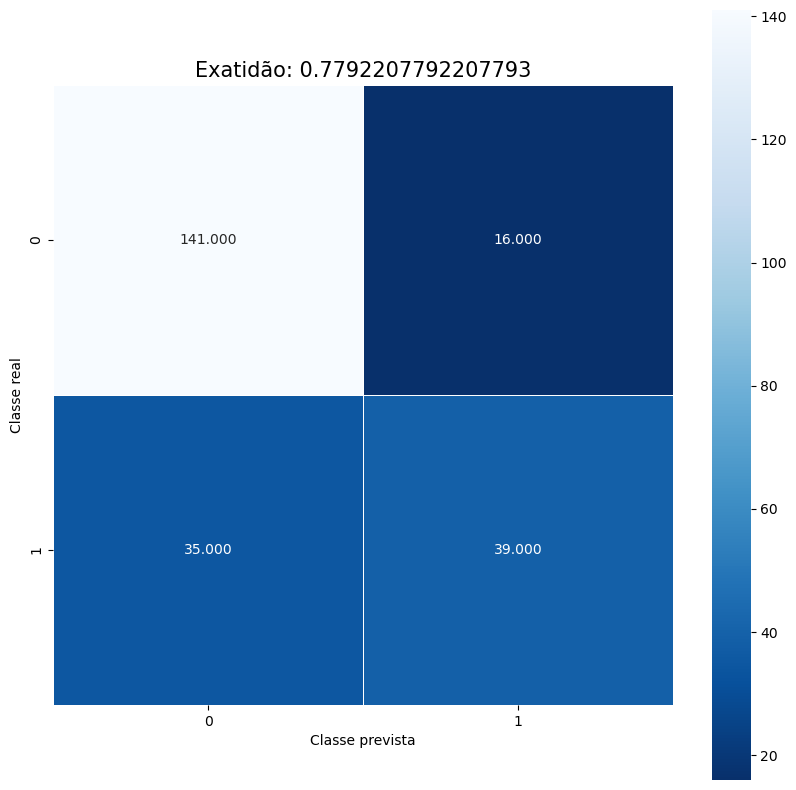

In [25]:
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Classe real');
plt.xlabel('Classe prevista');
all_sample_title = 'Exatidão: {0}'.format(logreg_acc)
plt.title(all_sample_title, size = 15);